In [1]:
%matplotlib inline

import os 
import json
import pandas as pd

import pycoco as pcc

In [2]:
# output_dir = "/Users/berto/projects/SDSS_sims/SDSS_SESNE_1/lcs/"
output_dir = "/Users/berto/projects/SDSS_sims/lcs/"
# output_dir = "/Users/berto/projects/SDSS_sims/testing/lcs/"
outlist = os.listdir(output_dir)
outlist = [i for i in outlist if i != ".DS_Store"]

# log_dir = "/Users/berto/projects/SDSS_sims/testing/logs/"
# log_dir = "/Users/berto/projects/SDSS_sims/SDSS_SESNE_1/logs/"
log_dir = "/Users/berto/projects/SDSS_sims/logs/"
log_list = os.listdir(log_dir)
log_list = [i for i in log_list if i != ".DS_Store"]

In [3]:
outlist[:5]

['SN_000001.dat',
 'SN_000002.dat',
 'SN_000003.dat',
 'SN_000004.dat',
 'SN_000005.dat']

In [4]:
log_list[:5]

['LOG_SN_000001.json',
 'LOG_SN_000002.json',
 'LOG_SN_000003.json',
 'LOG_SN_000004.json',
 'LOG_SN_000005.json']

/Users/berto/projects/SDSS_sims/lcs/SN_000001.dat


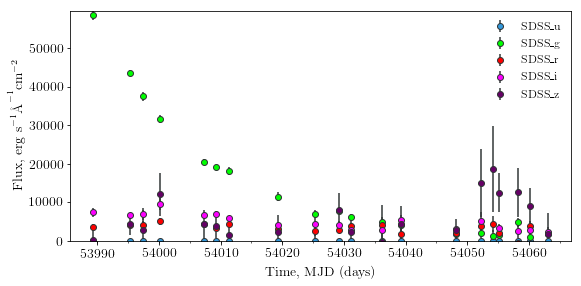

/Users/berto/projects/SDSS_sims/lcs/SN_000002.dat


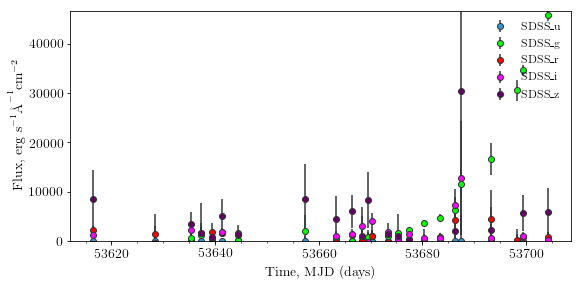

/Users/berto/projects/SDSS_sims/lcs/SN_000003.dat


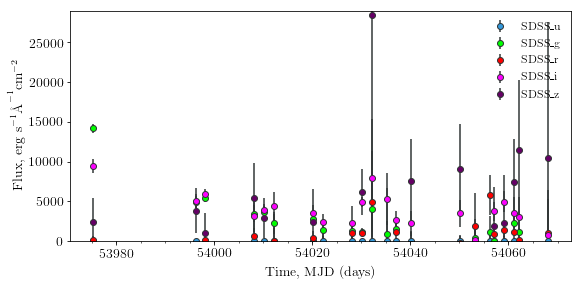

/Users/berto/projects/SDSS_sims/lcs/SN_000004.dat


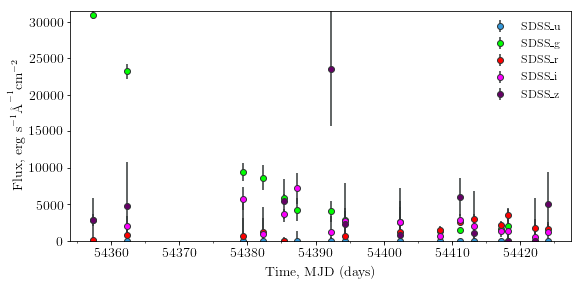

/Users/berto/projects/SDSS_sims/lcs/SN_000005.dat


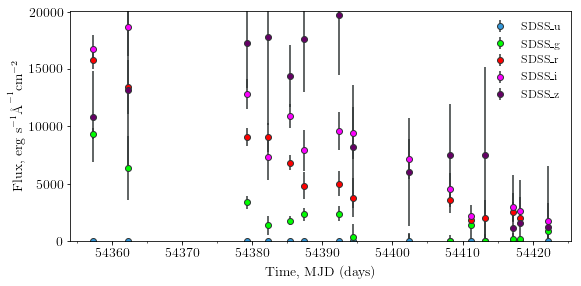

/Users/berto/projects/SDSS_sims/lcs/SN_000006.dat


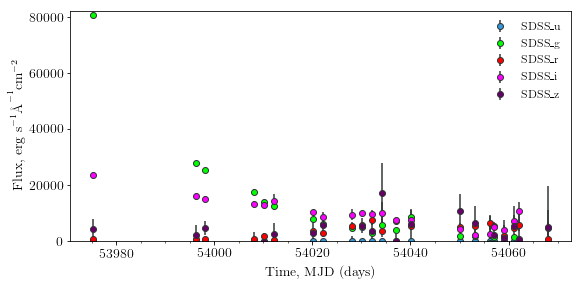

/Users/berto/projects/SDSS_sims/lcs/SN_000007.dat


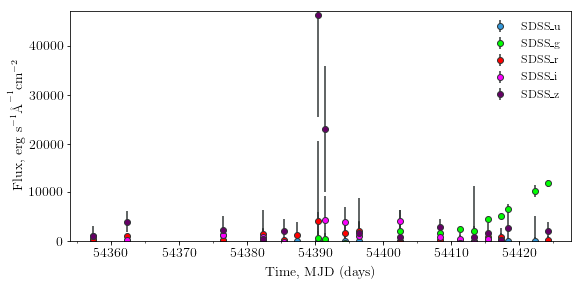

/Users/berto/projects/SDSS_sims/lcs/SN_000008.dat


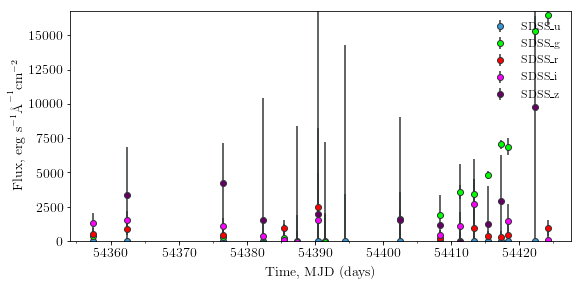

/Users/berto/projects/SDSS_sims/lcs/SN_000009.dat


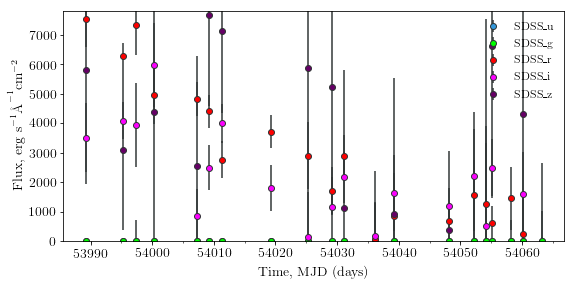

/Users/berto/projects/SDSS_sims/lcs/SN_000010.dat


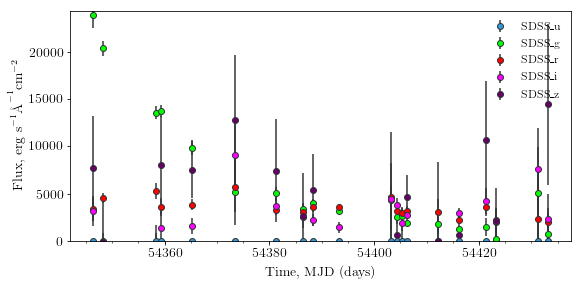

/Users/berto/projects/SDSS_sims/lcs/SN_000011.dat


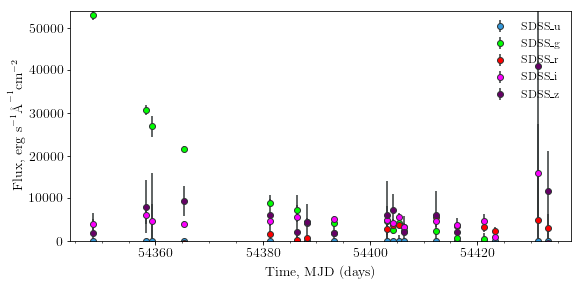

/Users/berto/projects/SDSS_sims/lcs/SN_000012.dat


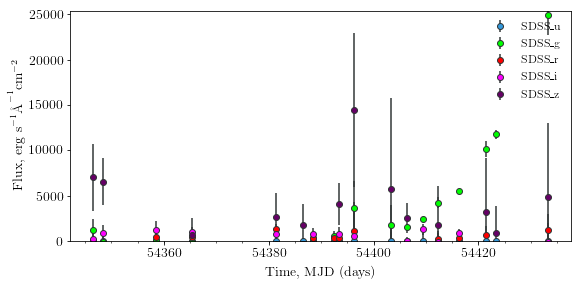

In [5]:
verbose = True
for i, snpath in enumerate(outlist):
    snpath = os.path.join(output_dir, snpath)
    if verbose: print(snpath)
    p = pcc.PhotometryClass()
    p.load(snpath)

    p.plot()
    if i > 10:
        break

In [6]:
# df = pd.DataFrame()
verbose = False
alldata = {}
# list_list = ["host_EBV", "mjdmax", "z_sim"]
list_list = ["host_EBV", "mjdmax"]

for j, snlog in enumerate(log_list):
    snlog = os.path.join(log_dir, snlog)
    if verbose: print(snlog)
    with open(snlog, "r") as json_file:  
        data = json.load(json_file)
        json_file.close()
    if j == 0:
        for keystring in data.keys():
            if keystring != "flux" and keystring != "w":
                alldata[keystring] = []
            
    for keystring in data.keys():
#         print(keystring)
        if keystring != "flux" and keystring != "w":
            if keystring in list_list:
                alldata[keystring].append(data[keystring][0])
            else:
                alldata[keystring].append(data[keystring])
            
            
            

In [ ]:
alldata.keys()

In [ ]:
output_df = pd.DataFrame.from_dict(alldata)

In [ ]:
output_df["z_sim"].hist(bins = 200)

In [ ]:
output_df["MW_EBV"].hist(bins=100)